# QUESTION 1 :

1. Linear regression and Regularization:
(a) Predict the “Overall” (target attribute: “overall”) rating of the players using Linear
regression report the Mean Absolute Error(MAE), Mean Square Error(MSE), R2 score.
(b) Compare the performance of linear regression, Ridge regression, and Lasso regression
models. Perform the hyperparameters tuning and observe how they affect the model’s
bias-variance trade-off, investigate the impact of the Lasso regularisation parameter on
this feature selection process.
Note: Please carry out the necessary data preprocessing and test-train split as 20 : 80%.
The use of the scikit-learn library is allowed for this question. For (b), include necessary
metrics like MSE, MAE, R2 Score for performance analysis and necessary plots (Ex:
Scatter plots/line plots) for hyperparameters tuning.


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from ydata_profiling import ProfileReport

In [7]:
# from pandas_profiling import ProfileReport
filePath="football.csv"
# loads the csv into a pandas defines structure called dataframe
df=pd.read_csv(filePath)

# Identify numeric and string columns
numeric_columns = df.select_dtypes(include=['int', 'float']).columns
string_columns = df.select_dtypes(include=['object']).columns
# Create a DataFrame with only numeric columns
df_numeric = df[numeric_columns]
df_string = df[string_columns]

In [9]:
df.head()

,sofifa_id,short_name,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,...,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,contribution_type
0,158023,L. Messi,93,93,78000000.0,320000.0,34,170,72,73.0,...,20,35,24,6,11,15,14,8,NaN,1
1,188545,R. Lewandowski,92,92,119500000.0,270000.0,32,185,81,21.0,...,35,42,19,15,6,12,8,10,NaN,1
2,20801,Cristiano Ronaldo,91,91,45000000.0,270000.0,36,187,83,11.0,...,24,32,24,7,11,15,14,11,NaN,1
3,190871,Neymar Jr,91,91,129000000.0,270000.0,29,175,68,73.0,...,35,32,29,9,9,15,15,11,NaN,1
4,192985,K. De Bruyne,91,91,125500000.0,350000.0,30,181,70,10.0,...,68,65,53,15,13,5,10,13,NaN,1


In [10]:
### Target value spliting
X=df.drop('overall',axis=1)
y=df['overall']

### Train Test Split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [13]:
X_train.shape,X_test.shape

((6217, 65), (1555, 65))

### EDA

In [14]:
### First see how target variable is looking

<AxesSubplot: >

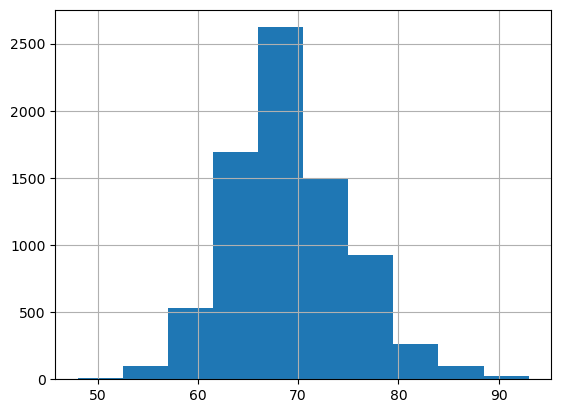

In [15]:
y.hist(bins=10)

In [16]:
y.describe()
### target values varies between 48 to 93

count    7772.000000
mean       68.864642
std         5.951090
min        48.000000
25%        65.000000
50%        68.000000
75%        73.000000
max        93.000000
Name: overall, dtype: float64

In [17]:
X_train.head().T

,5844,2570,3939,6761,3774
sofifa_id,248035,216463,207892,256597,256674
short_name,R. Grădinaru,H. Sakhi,J. Gyau,M. Kozak,J. Justvan
potential,66,76,68,67,76
value_eur,850000.0,2700000.0,1200000.0,700000.0,2800000.0
wage_eur,3000.0,5000.0,4000.0,1000.0,7000.0
...,...,...,...,...,...
goalkeeping_kicking,11,12,15,9,15
goalkeeping_positioning,6,16,15,13,9
goalkeeping_reflexes,13,11,6,10,9
goalkeeping_speed,NaN,NaN,NaN,NaN,NaN


In [18]:
import pandas as pd
import seaborn as sns

<AxesSubplot: xlabel='passing', ylabel='overall'>

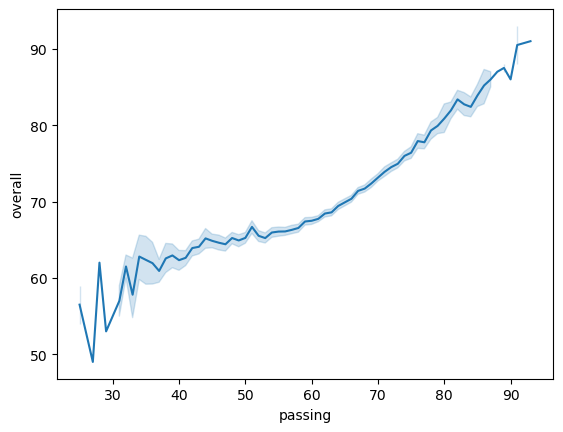

In [19]:
sns.lineplot(x = df['passing'],y = df['overall'])

<AxesSubplot: xlabel='dribbling', ylabel='overall'>

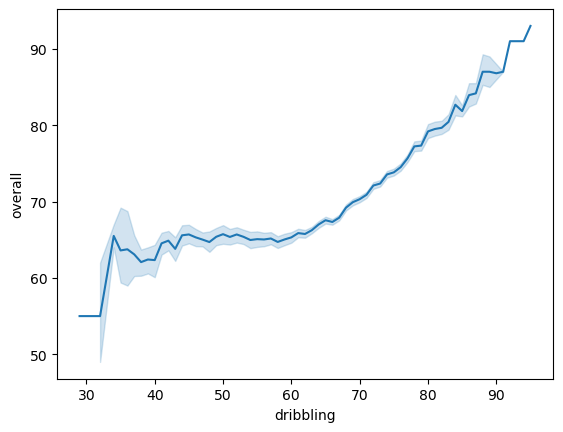

In [20]:
sns.lineplot(x = df['dribbling'],y = df['overall'])

<AxesSubplot: xlabel='mentality_composure', ylabel='overall'>

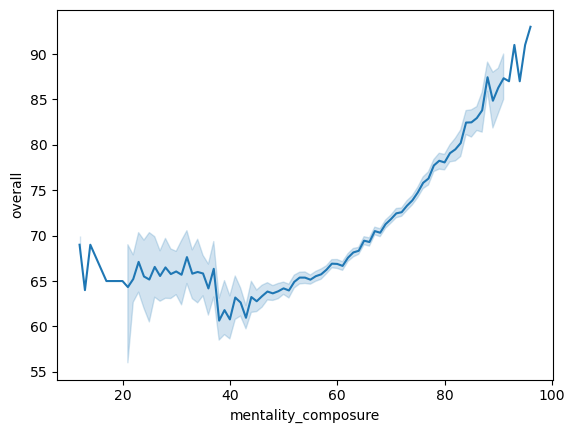

In [21]:
sns.lineplot(x = df['mentality_composure'],y = df['overall'])

In [22]:
X_train.columns

Index(['sofifa_id', 'short_name', 'potential', 'value_eur', 'wage_eur', 'age',
       'height_cm', 'weight_kg', 'club_team_id', 'club_name', 'league_name',
       'league_level', 'club_jersey_number', 'nation_jersey_number',
       'preferred_foot', 'weak_foot', 'skill_moves',
       'international_reputation', 'work_rate', 'body_type',
       'release_clause_eur', 'player_tags', 'player_traits', 'pace',
       'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_intercept

In [23]:
len(X_train.columns)

65

In [24]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6217 entries, 5844 to 7270
Data columns (total 65 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sofifa_id                    6217 non-null   int64  
 1   short_name                   6217 non-null   object 
 2   potential                    6217 non-null   int64  
 3   value_eur                    6162 non-null   float64
 4   wage_eur                     6164 non-null   float64
 5   age                          6217 non-null   int64  
 6   height_cm                    6217 non-null   int64  
 7   weight_kg                    6217 non-null   int64  
 8   club_team_id                 6164 non-null   float64
 9   club_name                    6164 non-null   object 
 10  league_name                  6164 non-null   object 
 11  league_level                 6164 non-null   float64
 12  club_jersey_number           6164 non-null   float64
 13  nation_jersey_n

In [25]:
X_train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
sofifa_id,6217.0,NaN,NaN,NaN,223777.736046,26730.766159,41.0,207805.0,228627.0,242554.0,264481.0
short_name,6217,6053,L. Rodríguez,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
potential,6217.0,NaN,NaN,NaN,72.071095,6.042702,53.0,68.0,72.0,76.0,95.0
value_eur,6162.0,NaN,NaN,NaN,4308021.746186,10412020.9487,35000.0,725000.0,1400000.0,3000000.0,194000000.0
wage_eur,6164.0,NaN,NaN,NaN,11895.611616,23998.534942,500.0,2000.0,4000.0,12000.0,350000.0
...,...,...,...,...,...,...,...,...,...,...,...
goalkeeping_kicking,6217.0,NaN,NaN,NaN,15.61171,16.417703,2.0,8.0,11.0,14.0,93.0
goalkeeping_positioning,6217.0,NaN,NaN,NaN,15.85797,17.274459,2.0,8.0,11.0,14.0,92.0
goalkeeping_reflexes,6217.0,NaN,NaN,NaN,16.076243,17.946294,2.0,8.0,11.0,14.0,90.0
goalkeeping_speed,574.0,NaN,NaN,NaN,40.060976,10.456497,15.0,32.0,41.0,47.0,65.0


In [26]:
# profile=ProfileReport(X_train)

In [27]:
# profile

In [28]:
# X_train.corr()
X_train.select_dtypes(include=['number']).corr()

,sofifa_id,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,club_jersey_number,...,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,contribution_type
sofifa_id,1.000000,0.055078,-0.071606,-0.193228,-0.724545,-0.106137,-0.172295,0.142385,-0.045997,0.081601,...,-0.057055,-0.004588,0.000921,-0.134086,-0.138258,-0.138406,-0.141240,-0.133909,-0.334031,0.045828
potential,0.055078,1.000000,0.603480,0.557146,-0.315674,0.006961,-0.011470,-0.324841,-0.225263,0.006760,...,0.107354,0.095513,0.085308,0.050136,0.045447,0.045529,0.047377,0.048298,0.173095,0.047999
value_eur,-0.071606,0.603480,1.000000,0.835749,-0.049933,0.014980,0.025802,-0.227676,-0.142443,-0.019753,...,0.096401,0.076907,0.062732,0.000094,-0.001843,-0.001092,-0.004004,0.000946,0.185862,0.069691
wage_eur,-0.193228,0.557146,0.835749,1.000000,0.075185,0.032376,0.052277,-0.261808,-0.142851,-0.019621,...,0.114184,0.092477,0.078329,-0.000077,-0.001103,-0.002459,-0.004381,0.000704,0.246208,0.053389
age,-0.724545,-0.315674,-0.049933,0.075185,1.000000,0.088214,0.208212,0.087531,-0.062153,-0.060582,...,0.045408,0.001239,-0.000663,0.140444,0.144149,0.146118,0.148974,0.141912,0.272964,-0.083283
height_cm,-0.106137,0.006961,0.014980,0.032376,0.088214,1.000000,0.771023,-0.120500,0.081776,-0.052058,...,-0.071553,-0.085449,-0.085925,0.344470,0.345302,0.342567,0.344735,0.341508,-0.101489,-0.311638
weight_kg,-0.172295,-0.011470,0.025802,0.052277,0.208212,0.771023,1.000000,-0.058972,0.013437,-0.047234,...,-0.068288,-0.089641,-0.089484,0.322117,0.324897,0.323344,0.325580,0.322376,0.006534,-0.268201
club_team_id,0.142385,-0.324841,-0.227676,-0.261808,0.087531,-0.120500,-0.058972,1.000000,-0.142926,0.071435,...,-0.086361,-0.073578,-0.068373,-0.012314,-0.019900,-0.015214,-0.012552,-0.009846,-0.143918,0.004927
league_level,-0.045997,-0.225263,-0.142443,-0.142851,-0.062153,0.081776,0.013437,-0.142926,1.000000,-0.099940,...,-0.041138,-0.037187,-0.034113,-0.012060,-0.006629,-0.011838,-0.010835,-0.013664,-0.013935,-0.016277
club_jersey_number,0.081601,0.006760,-0.019753,-0.019621,-0.060582,-0.052058,-0.047234,0.071435,-0.099940,1.000000,...,-0.036489,-0.022986,-0.019427,-0.047404,-0.049965,-0.045462,-0.049657,-0.047456,0.005664,0.066102


In [37]:
X_train['value_eur'].corr(y)

0.634868521012

In [38]:
X_train['wage_eur'].corr(y)

0.6562951506747627

In [39]:
X_train['age'].corr(y)

0.2439273754164481

In [40]:
X_train['height_cm'].corr(y)

0.03395905282475116

In [41]:
X_train['weight_kg'].corr(y)

0.09972531949471099

In [42]:
X_train['weak_foot'].corr(y)

0.20179239438268765

In [43]:
X_train['skill_moves'].corr(y)

0.30308940176253535

In [44]:
X_train['player_traits'].value_counts()

Speed Dribbler (AI)                                                                 242
Power Header                                                                        154
Dives Into Tackles (AI)                                                             150
Injury Prone                                                                        146
Long Shot Taker (AI)                                                                143
                                                                                   ... 
Solid Player, Dives Into Tackles (AI), Early Crosser, Long Shot Taker (AI)            1
Leadership, Early Crosser, Speed Dribbler (AI)                                        1
Leadership, Long Shot Taker (AI), Playmaker (AI), Outside Foot Shot, Team Player      1
Leadership, Team Player, Rushes Out Of Goal, Comes For Crosses, Saves with Feet       1
Early Crosser, Playmaker (AI), Team Player                                            1
Name: player_traits, Length: 731

How is the correlation between all NUMERIC cols?

In [45]:
df_numeric.corr()['overall']

sofifa_id                     -0.340084
overall                        1.000000
potential                      0.774305
value_eur                      0.639737
wage_eur                       0.656869
age                            0.244499
height_cm                      0.033245
weight_kg                      0.101072
club_team_id                  -0.290240
league_level                  -0.280097
club_jersey_number            -0.033303
nation_jersey_number          -0.094540
weak_foot                      0.197699
skill_moves                    0.306108
international_reputation       0.566840
release_clause_eur             0.635511
pace                           0.170060
shooting                       0.458033
passing                        0.664934
dribbling                      0.625636
defending                      0.247873
physic                         0.359226
attacking_crossing             0.279566
attacking_finishing            0.271530
attacking_heading_accuracy     0.215120


In [46]:
feature_cols=['potential', 'value_eur', 'wage_eur', 
       'preferred_foot', 'weak_foot', 'skill_moves',
       'international_reputation', 'work_rate', 'body_type',
       'pace',
        'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle',
       'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed',
       'contribution_type']

In [47]:
# 'sofifa_id' -- unique columns indentifer not useful for prediction
#' short_name' --  not useful for prediction
# 'potential' -- no missing values, good correlation with overall
# 'value_eur' -- less missing values, good correlation might require normalization
# 'wage_eur' -- less missing values, good correlation might require normalization
#  'age' --  not correlated
# 'height_cm' -- not correlated
# 'weight_kg' -- not correlated
# 'club_team_id -- not useful
# 'club_name' -- not useful
# 'league_name' -- not useful
# 'league_level' -- not useful
# 'club_jersey_number' -- not useful
# 'nation_jersey_number' -- not useful


# 'preferred_foot'
# 'weak_foot' 
# 'skill_moves',
# 'international_reputation', 
# 'work_rate', 
# 'body_type',
# 'release_clause_eur', -- not useful
# 'player_tags',  -- not required
# 'player_traits',
# 'pace',
# 'shooting', 
# 'passing', 
# 'dribbling',
# 'defending', 
# 'physic',
# 'attacking_crossing', 
# 'attacking_finishing',
# 'attacking_heading_accuracy', 
# 'attacking_short_passing',
# 'attacking_volleys',
# 'skill_dribbling', 
# 'skill_curve',
# 'skill_fk_accuracy', 
# 'skill_long_passing',
# 'skill_ball_control',
# 'movement_acceleration',
# 'movement_sprint_speed', 
# 'movement_agility',
# 'movement_reactions', 
# 'movement_balance', 
# 'power_shot_power',
# 'power_jumping', 
# 'power_stamina', 
# 'power_strength', 
# 'power_long_shots',
# 'mentality_aggression', 
# 'mentality_interceptions',
# 'mentality_positioning',
# 'mentality_vision', 
# 'mentality_penalties',
# 'mentality_composure',
# 'defending_marking_awareness',
# 'defending_standing_tackle',
# 'defending_sliding_tackle',
# 'goalkeeping_diving', 
# 'goalkeeping_handling', 
# 'goalkeeping_kicking',
# 'goalkeeping_positioning',
# 'goalkeeping_reflexes', 
# 'goalkeeping_speed',
# 'contribution_type'


In [48]:
### removing value_eur,wage_eur,club_team_id,club_name,league_name,league_level,club_jersey_number not needed for modeling
### removing nation_jersey_number,player_tags too many null values

In [49]:
### finding categorical columns
### filling mission values

### Missing Values

In [50]:
X_train[feature_cols].isna().sum()

potential                         0
value_eur                        55
wage_eur                         53
preferred_foot                    0
weak_foot                         0
skill_moves                       0
international_reputation          0
work_rate                         0
body_type                         0
pace                            574
shooting                        574
passing                         574
dribbling                       574
defending                       574
physic                          574
attacking_crossing                0
attacking_finishing               0
attacking_heading_accuracy        0
attacking_short_passing           0
attacking_volleys                 0
skill_dribbling                   0
skill_curve                       0
skill_fk_accuracy                 0
skill_long_passing                0
skill_ball_control                0
movement_acceleration             0
movement_sprint_speed             0
movement_agility            

In [51]:
#Getting all missing columns in one place
missing_columns=X_train[feature_cols].columns[X_train[feature_cols].isna().sum()!=0]
missing_columns

Index(['value_eur', 'wage_eur', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'goalkeeping_speed'],
      dtype='object')

In [52]:
X_train[missing_columns].isna().sum()

value_eur              55
wage_eur               53
pace                  574
shooting              574
passing               574
dribbling             574
defending             574
physic                574
goalkeeping_speed    5643
dtype: int64

In [53]:
#value_eur,wage_eur can be filled with average val

In [54]:
## checking if [pace ,shooting,passing,dribbling,defending,physic]   is missing only for goal keepers

In [55]:
X_train[X_train['goalkeeping_speed'].isna()].shape,X_train[~X_train['goalkeeping_speed'].isna()].shape

((5643, 65), (574, 65))

In [56]:
### goal keeping speed is missing for all the non goal keepers
### [pace ,shooting,passing,dribbling,defending,physic] is missing for all the goal keepers

In [57]:
X_train

,sofifa_id,short_name,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,club_name,...,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,contribution_type
5844,248035,R. Grădinaru,66,850000.0,3000.0,25,180,77,112637.0,Gaz Metan Mediaş,...,52,57,52,5,14,11,6,13,NaN,1
2570,216463,H. Sakhi,76,2700000.0,5000.0,25,176,72,57.0,AJ Auxerre,...,58,60,59,9,13,12,16,11,NaN,1
3939,207892,J. Gyau,68,1200000.0,4000.0,28,175,75,113149.0,FC Cincinnati,...,65,58,56,12,6,15,15,6,NaN,1
6761,256597,M. Kozak,67,700000.0,1000.0,24,176,60,111088.0,Radomiak Radom,...,23,24,25,10,6,9,13,10,NaN,1
3774,256674,J. Justvan,76,2800000.0,7000.0,23,178,65,10030.0,SC Paderborn 07,...,40,33,43,12,10,15,9,9,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5226,237138,Y. Maziz,71,1300000.0,5000.0,23,175,68,112695.0,Seraing,...,23,39,31,7,9,14,10,10,NaN,1
5390,257361,Iago López,76,1800000.0,2000.0,22,177,66,110069.0,CD Mirandés,...,59,63,64,7,13,12,11,9,NaN,0
860,203741,T. Delaine,76,6500000.0,19000.0,29,180,70,68.0,FC Metz,...,67,68,68,15,11,14,10,10,NaN,0
7603,262424,S. Mogoșanu,60,170000.0,1000.0,28,180,77,115716.0,FC U Craiova 1948,...,6,14,12,58,56,60,59,58,40.0,0


In [58]:
X_train.loc[~X_train['goalkeeping_speed'].isna(),missing_columns].isna().sum()

value_eur              7
wage_eur               7
pace                 574
shooting             574
passing              574
dribbling            574
defending            574
physic               574
goalkeeping_speed      0
dtype: int64

In [59]:
### replacing goalkeeping_speed with 0
### replacing [pace ,shooting,passing,dribbling,defending,physic] with minimum value

In [60]:
### Decision tree can handle missing values naturally

### Filling NULL values

In [61]:
fill_pace=X_train['pace'].min()
fill_shooting=X_train['shooting'].min()
fill_passing=X_train['passing'].min()
fill_dribbling=X_train['dribbling'].min()
fill_defending=X_train['defending'].min()
fill_physic=X_train['physic'].min()

In [62]:
fill_goalkeeping_speed=X_train['goalkeeping_speed'].min()

In [63]:
fill_value=X_train['value_eur'].mean()
fill_wage=X_train['wage_eur'].mean()

In [64]:
X_train['pace']=fill_pace
X_train['shooting']=fill_shooting
X_train['passing']=fill_passing
X_train['dribbling']=fill_dribbling
X_train['defending']=fill_defending
X_train['physic']=fill_physic
X_train['goalkeeping_speed']=fill_goalkeeping_speed

X_train['value_eur']=fill_value
X_train['wage_eur']=fill_wage

In [65]:
X_train[missing_columns].isna().sum()

value_eur            0
wage_eur             0
pace                 0
shooting             0
passing              0
dribbling            0
defending            0
physic               0
goalkeeping_speed    0
dtype: int64

In [66]:
### removing the highly corelated variables

In [67]:
# Compute the correlation matrix
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Set a correlation threshold
correlation_threshold = 0.95

# Create a mask to identify highly correlated variables
correlation_mask = (np.abs(correlation_matrix) > correlation_threshold) & (correlation_matrix < 1.0)

# Identify the highly correlated variables
correlated_variables = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if correlation_mask.iloc[i, j]:
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]
            correlated_variables.add(colname_i)
            correlated_variables.add(colname_j)



In [68]:
final_feature_cols= [x for x in feature_cols if x not in correlated_variables]

In [69]:
final_feature_cols

['potential',
 'wage_eur',
 'preferred_foot',
 'weak_foot',
 'skill_moves',
 'international_reputation',
 'work_rate',
 'body_type',
 'passing',
 'physic',
 'attacking_crossing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'power_long_shots',
 'mentality_aggression',
 'mentality_positioning',
 'mentality_vision',
 'mentality_penalties',
 'mentality_composure',
 'contribution_type']

In [70]:
### Feature engineering

In [71]:
## categorical_columns
categorical_columns = X_train[feature_cols].select_dtypes(include=['object', 'category']).columns
categorical_columns

Index(['preferred_foot', 'work_rate', 'body_type'], dtype='object')

In [72]:
X_train['preferred_foot'].value_counts()

Right    4699
Left     1518
Name: preferred_foot, dtype: int64

In [73]:
X_train['work_rate'].value_counts()

Medium/Medium    2827
High/Medium      1279
Medium/High       775
High/High         504
High/Low          277
Medium/Low        229
Low/High          167
Low/Medium        146
Low/Low            13
Name: work_rate, dtype: int64

In [74]:
X_train['body_type'].value_counts()

Normal (170-185)    2235
Normal (185+)       1441
Lean (170-185)      1160
Lean (185+)          578
Normal (170-)        216
Stocky (170-185)     206
Stocky (185+)        138
Lean (170-)          127
Unique                78
Stocky (170-)         38
Name: body_type, dtype: int64

In [75]:
## use mapping
work_rate_map={'Medium/Medium'  :4,'High/Medium'      :7,'Medium/High'       :5,'High/High'         :8,'High/Low'          :6,'Medium/Low'        :3,'Low/High'         : 2,'Low/Medium'      :  1,'Low/Low'     :      0}

In [76]:
body_type_map={'Normal (170-185)'    :3
,'Normal (185+)'       :3
,'Lean (170-185)'      :2
,'Lean (185+)'         :2
,'Normal (170-)'       :3
,'Stocky (170-185)'    :1
,'Stocky (185+)'       :1
,'Lean (170-)'         :2
,'Unique'              :4
,'Stocky (170-)'       :1}

In [77]:
X_train['work_rate']=X_train['work_rate'].map(work_rate_map)
X_train['body_type']=X_train['body_type'].map(body_type_map)

In [78]:
### normalize

categorical_columns = X_train[feature_cols].select_dtypes(include=['object', 'category']).columns
numerical_columns=X_train[feature_cols].select_dtypes(include=['int64', 'float64']).columns
categorical_columns,numerical_columns


(Index(['preferred_foot'], dtype='object'),
 Index(['potential', 'value_eur', 'wage_eur', 'weak_foot', 'skill_moves',
        'international_reputation', 'work_rate', 'body_type', 'pace',
        'shooting', 'passing', 'dribbling', 'defending', 'physic',
        'attacking_crossing', 'attacking_finishing',
        'attacking_heading_accuracy', 'attacking_short_passing',
        'attacking_volleys', 'skill_dribbling', 'skill_curve',
        'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
        'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
        'movement_reactions', 'movement_balance', 'power_shot_power',
        'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
        'mentality_aggression', 'mentality_interceptions',
        'mentality_positioning', 'mentality_vision', 'mentality_penalties',
        'mentality_composure', 'defending_marking_awareness',
        'defending_standing_tackle', 'defending_sliding_tackle',
 

###  Creating Model

In [79]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer


In [80]:
### creating pipeline
num_pipeline = Pipeline([('std_scaler', MinMaxScaler())])
cat_pipeline = Pipeline([('cat', OneHotEncoder(sparse_output=False,handle_unknown='ignore'))])


In [81]:
num_attribs = numerical_columns
cat_attribs = categorical_columns
#neutral_attribs=[]

full_pipeline = ColumnTransformer(transformers=[
       #("dont_tranforst","passthrough",neutral_attribs),
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ],remainder='drop')


In [82]:
from sklearn.linear_model import LinearRegression
model = Pipeline([('full_pipeline', full_pipeline),('clf', LinearRegression())])
model.fit(X_train,y_train)

Pipeline(steps=[('full_pipeline',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('std_scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['potential', 'value_eur', 'wage_eur', 'weak_foot', 'skill_moves',
       'international_reputation', 'work_rate', 'body_type', 'pace',
       'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attack...
       'defending_standing_tackle', 'defending_sliding_tackle',
       'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed',
       'contribution_type'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('cat',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['preferred_foot'], dtype='object'))])),
                ('clf', LinearRegression())])

In [83]:
### preparing  test dataset



X_test['pace']=fill_pace
X_test['shooting']=fill_shooting
X_test['passing']=fill_passing
X_test['dribbling']=fill_dribbling
X_test['defending']=fill_defending
X_test['physic']=fill_physic
X_test['goalkeeping_speed']=fill_goalkeeping_speed

X_test['value_eur']=fill_value
X_test['wage_eur']=fill_wage



X_test['work_rate']=X_test['work_rate'].map(work_rate_map)
X_test['body_type']=X_test['body_type'].map(body_type_map)


In [84]:
#Finding the r2 score and root mean squared error
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

In [85]:
y_pred=model.predict(X_test)
r2=r2_score(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)
print('r2:score',r2)
print('mse error',mse)
print('mean absolution error:',mae)

r2:score 0.9058546418740848
mse error 3.5394159241504606
mean absolution error: 1.4648244385550644


In [86]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV, train_test_split

In [87]:
alphas = [0.01, 0.1, 1, 10, 100]

## LASSO

In [88]:
ridge =  Pipeline([('full_pipeline', full_pipeline),('clf', Lasso())])
param_grid = {'clf__alpha': alphas}
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'clf__alpha': 0.01}

In [89]:
### alpha for lasso 0.01
model = Pipeline([('full_pipeline', full_pipeline),('clf', Lasso(alpha=0.01))])
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
r2=r2_score(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)
print('r2:score',r2)
print('mse error',mse)
print('mean absolution error:',mae)

r2:score 0.9006368998839958
mse error 3.7355781084095074
mean absolution error: 1.4991327722429109


## Ridge

In [90]:
ridge =  Pipeline([('full_pipeline', full_pipeline),('clf', Ridge())])
param_grid = {'clf__alpha': alphas}
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'clf__alpha': 1}

In [91]:
### alpha for ridge 1
model = Pipeline([('full_pipeline', full_pipeline),('clf', Ridge(alpha=1))])
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
r2=r2_score(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)
print('r2:score',r2)
print('mse error',mse)
print('mean absolution error:',mae)

r2:score 0.9058578312253532
mse error 3.539296019771831
mean absolution error: 1.4655107399466778


In [92]:
##finding alpha

## END